# Bike Sharing Demand

El sistema de bicicletas compartidas de Washington, requiere estimar la demanda de uso en las diferentes estaciones del  año, a través de patrones de uso históricos con datos meteorológicos, con el fin de poder:

* Presupuestar los recursos 
* Dimensionar logística de funcionamiento 
* Estimar reparaciones 
 *Proyectar ingresos

## Importación de Librerias

In [361]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargue de datos train y test

In [362]:
train = pd.read_csv("./Datos/train.csv")
test = pd.read_csv("./Datos/test.csv")
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


## Depuración de la base de Entrenamiento

#### Modificación de los Tipos de Variables

In [363]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

A continuación se modificarán los tipos de variables.

In [364]:
from datetime import datetime

# Convertir a fecha hora
train['datetime'] = train['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

# Asignar niveles a los factores
train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
test["weather"] = test.weather.map({1: " Clear+Few_clouds +Partly_cloudy+Partly_cloudy",\
                                        2 : "Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist", \
                                        3 : "Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds", \
                                        4 :"Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog" })

# Convertir a categorias
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
train["holiday"] = train["holiday"].astype("category")
train["workingday"] = train["workingday"].astype("category")

train.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

### Construcción de Variables asociadas a la fecha

In [365]:
train['Date']=train["datetime"].dt.date
train['Hour']=train["datetime"].dt.hour
train['Weekday']=train["datetime"].dt.weekday
train['Month']=train["datetime"].dt.month
train['Year']=train["datetime"].dt.year

train["Hour"] = train["Hour"].astype("category")
train["Weekday"] = train["Weekday"].astype("category")
train["Month"] = train["Month"].astype("category")
train["Year"] = train["Year"].astype("category")

### Eliminación de Variables innecesarias

In [366]:
train  = train.drop(["datetime", "casual", "registered" ],axis=1)
# Las variables casual y registered no estan en la base de test, adicionalmente, 
# la suma de dichas variables corresponde a la variable objetivo
train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,Date,Hour,Weekday,Month,Year
0,Spring,0,0,1,9.84,14.395,81,0.0,16,2011-01-01,0,5,1,2011
1,Spring,0,0,1,9.02,13.635,80,0.0,40,2011-01-01,1,5,1,2011
2,Spring,0,0,1,9.02,13.635,80,0.0,32,2011-01-01,2,5,1,2011


## Análisis Exploratorio

### Valores Ausentes

In [367]:
train.apply(lambda x: x.isnull().sum(), axis=0)

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
Date          0
Hour          0
Weekday       0
Month         0
Year          0
dtype: int64

En la base de datos no se encuentran valores ausentes en ninguna de las variables.

### Análisis Exploratorio

##### Variables Categóricas

[Text(0,0.5,'Count'), Text(0.5,1,'Year')]

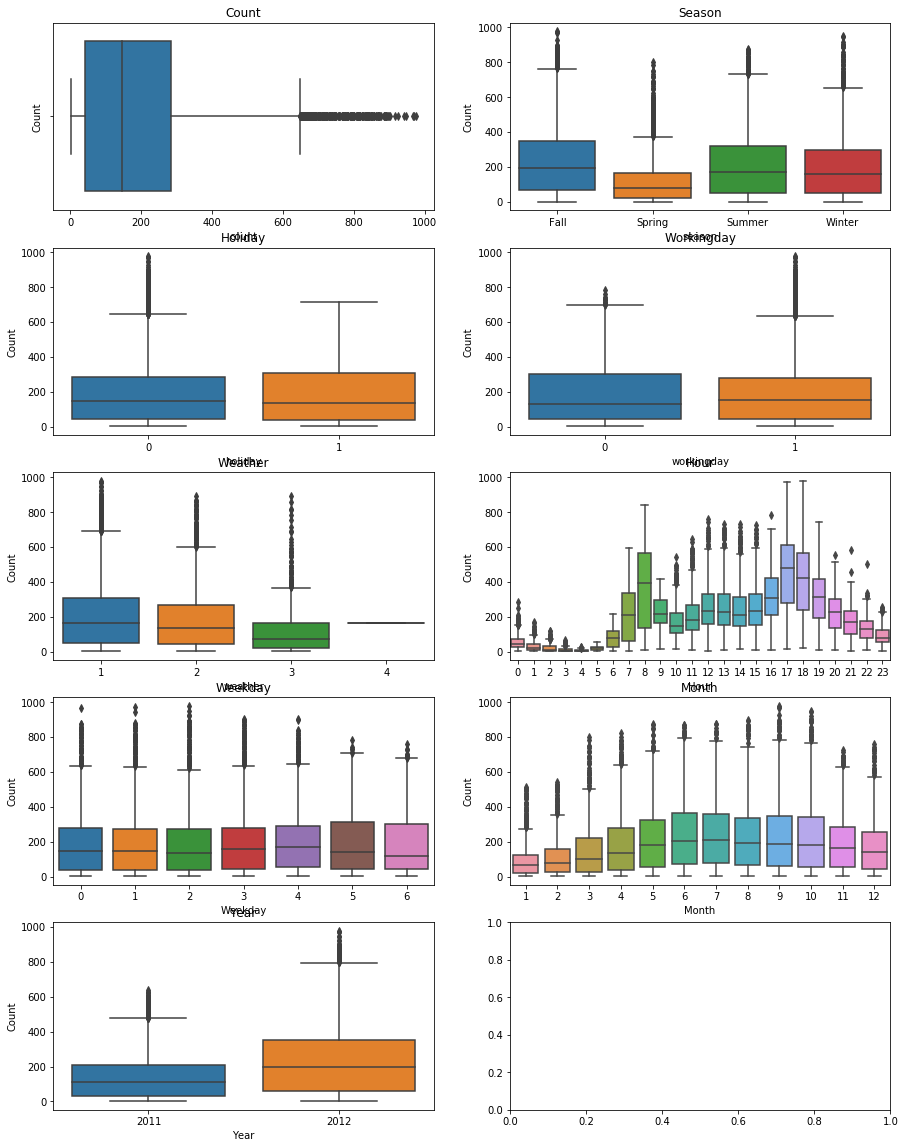

In [368]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 20)
sns.boxplot(data=train,y="count",orient="h",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="holiday",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="count",x="weather",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="count",x="Hour",orient="v",ax=axes[2][1])
sns.boxplot(data=train,y="count",x="Weekday",orient="v",ax=axes[3][0])
sns.boxplot(data=train,y="count",x="Month",orient="v",ax=axes[3][1])
sns.boxplot(data=train,y="count",x="Year",orient="v",ax=axes[4][0])

axes[0][0].set(ylabel='Count',title="Count")
axes[0][1].set(ylabel='Count',title="Season")
axes[1][0].set(ylabel='Count',title="Holiday")
axes[1][1].set(ylabel='Count',title="Workingday")
axes[2][0].set(ylabel='Count',title="Weather")
axes[2][1].set(ylabel='Count',title="Hour")
axes[3][0].set(ylabel='Count',title="Weekday")
axes[3][1].set(ylabel='Count',title="Month")
axes[4][0].set(ylabel='Count',title="Year")

##### Variables Numéricas

[Text(0.5,1,'Count vs windspeed')]

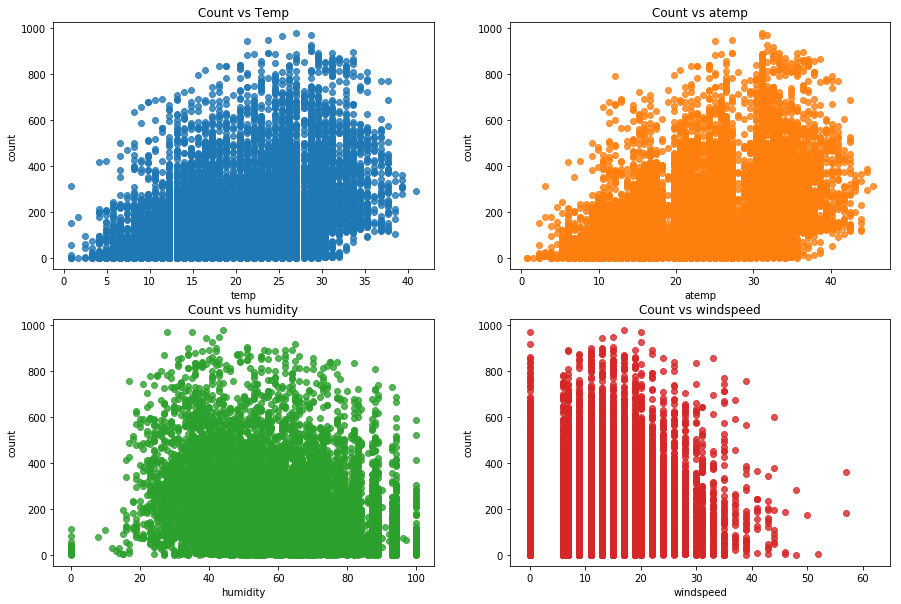

In [369]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15, 10)

sns.regplot(x=train["temp"], y=train["count"], fit_reg=False, ax=axes[0][0])
sns.regplot(x=train["atemp"], y=train["count"], fit_reg=False,ax=axes[0][1])
sns.regplot(x=train["humidity"], y=train["count"], fit_reg=False,ax=axes[1][0])
sns.regplot(x=train["windspeed"], y=train["count"], fit_reg=False,ax=axes[1][1])

axes[0][0].set(title="Count vs Temp")
axes[0][1].set(title="Count vs atemp")
axes[1][0].set(title="Count vs humidity")
axes[1][1].set(title="Count vs windspeed")

In [370]:
train.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
count            int64
Date            object
Hour          category
Weekday       category
Month         category
Year          category
dtype: object

##### Correlación entre Variables

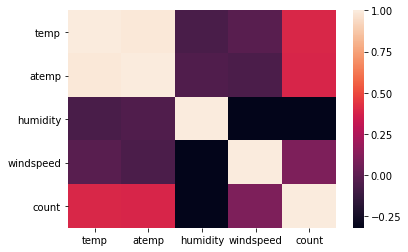

In [371]:
sns.heatmap(train.corr())

In [372]:
train.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


Las variables **temp** y **atemp** tine una correlación de *0.9849* por lo cual se decide eliminar la variable **atemp**.

In [373]:
train  = train.drop(["atemp"],axis=1)
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,Date,Hour,Weekday,Month,Year
0,Spring,0,0,1,9.84,81,0.0,16,2011-01-01,0,5,1,2011
1,Spring,0,0,1,9.02,80,0.0,40,2011-01-01,1,5,1,2011
2,Spring,0,0,1,9.02,80,0.0,32,2011-01-01,2,5,1,2011
3,Spring,0,0,1,9.84,75,0.0,13,2011-01-01,3,5,1,2011
4,Spring,0,0,1,9.84,75,0.0,1,2011-01-01,4,5,1,2011


In [374]:
season_df=pd.get_dummies(train['season'],prefix='s',drop_first=True)
weather_df=pd.get_dummies(train['weather'],prefix='w',drop_first=True)
hour_df=pd.get_dummies(train['Hour'],prefix='h',drop_first=True)
weekday_df=pd.get_dummies(train['Weekday'],prefix='wd',drop_first=True)
month_df=pd.get_dummies(train['Month'],prefix='m',drop_first=True)
year_df=pd.get_dummies(train['Year'],prefix='y',drop_first=True)

train=train.join(season_df)
train=train.join(weather_df)
train=train.join(hour_df)
train=train.join(weekday_df)
train=train.join(month_df)                     
train=train.join(year_df)

In [375]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'Date', 'Hour', 'Weekday', 'Month', 'Year',
       's_Spring', 's_Summer', 's_Winter', 'w_2', 'w_3', 'w_4', 'h_1', 'h_2',
       'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12',
       'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
       'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2',
       'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12',
       'y_2012'],
      dtype='object')

## Modelos

### Partición Train / Test

In [376]:
from sklearn.model_selection import train_test_split

train=train.rename(columns={'count': 'y'}) # Es necesario cambiar el nombre de count, para qe no lo tome como funcion.

# Definir X y y
feature_cols = ['s_Spring', 's_Summer', 's_Winter', 'holiday', 'workingday', 'w_2', 'w_3', 'w_4',
                'temp', 'humidity', 'windspeed','h_1', 'h_2','h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 
                'h_10', 'h_11', 'h_12','h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
                'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2','m_3', 'm_4', 'm_5', 'm_6', 
                'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12','y_2012']
X = train[feature_cols]
y = train.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31415)

### Regresión Lineal

In [377]:
from sklearn.cross_validation import cross_val_score
logreg = LinearRegression()
results = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')

In [378]:
pd.Series(-results).describe()

count    1.000000e+01
mean     3.098990e+20
std      9.799865e+20
min      6.251581e+03
25%      6.941392e+03
50%      1.123673e+04
75%      1.648880e+04
max      3.098990e+21
dtype: float64

### Random Forest

In [380]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=1000)
results = cross_val_score(RF_reg, X, y, cv=10, scoring='neg_mean_squared_error')

In [381]:
pd.Series(-results).describe()

count       10.000000
mean      5546.218768
std       2653.351594
min       2526.664725
25%       3433.323844
50%       4975.855254
75%       7530.860205
max      10137.801149
dtype: float64

### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_reg = GradientBoostingRegressor(n_estimators=4000,alpha=0.01)
results = cross_val_score(gbm_reg, X, y, cv=10, scoring='neg_mean_squared_error')

In [ ]:
pd.Series(-results).describe()

## Calificación de la base de test

In [ ]:
# Convertir a fecha hora
test['datetime'] = test['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

# Asignar niveles a los factores
test["season"] = test.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
test["weather"] = test.weather.map({1: " Clear+Few_clouds +Partly_cloudy+Partly_cloudy",\
                                        2 : "Mist+Cloudy,Mist+Broken_clouds,Mist+Few_clouds,Mist", \
                                        3 : "Light_Snow,Light_Rain+Thunderstorm+Scattered_clouds,Light_Rain+Scattered_clouds", \
                                        4 :"Heavy_Rain+Ice_Pallets+Thunderstorm+Mist,Snow+Fog" })

test['Date']=test["datetime"].dt.date
test['Hour']=test["datetime"].dt.hour
test['Weekday']=test["datetime"].dt.weekday
test['Month']=test["datetime"].dt.month
test['Year']=test["datetime"].dt.year

# Convertir a categorias
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
test["holiday"] = test["holiday"].astype("category")
test["workingday"] = test["workingday"].astype("category")
test["Hour"] = test["Hour"].astype("category")
test["Weekday"] = test["Weekday"].astype("category")
test["Month"] = test["Month"].astype("category")
test["Year"] = test["Year"].astype("category")

# Eiminación de Variables
test  = test.drop(["datetime", "atemp"],axis=1)

# Creación de Dummies
season_df=pd.get_dummies(test['season'],prefix='s',drop_first=True)
weather_df=pd.get_dummies(test['weather'],prefix='w',drop_first=True)
hour_df=pd.get_dummies(test['Hour'],prefix='h',drop_first=True)
weekday_df=pd.get_dummies(test['Weekday'],prefix='wd',drop_first=True)
month_df=pd.get_dummies(test['Month'],prefix='m',drop_first=True)
year_df=pd.get_dummies(test['Year'],prefix='y',drop_first=True)

test=test.join(season_df)
test=test.join(weather_df)
test=test.join(hour_df)
test=test.join(weekday_df)
test=test.join(month_df)                     
test=test.join(year_df)

In [360]:
feature_cols = ['s_Spring', 's_Summer', 's_Winter', 'holiday', 'workingday', 'w_2', 'w_3', 'w_4',
                'temp', 'humidity', 'windspeed','h_1', 'h_2','h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9', 
                'h_10', 'h_11', 'h_12','h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21',
                'h_22', 'h_23', 'wd_1', 'wd_2', 'wd_3', 'wd_4', 'wd_5', 'wd_6', 'm_2','m_3', 'm_4', 'm_5', 'm_6', 
                'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12','y_2012']
Test_X = test[feature_cols]

KeyError: "['s_Spring' 's_Summer' 's_Winter' 'w_2' 'w_3' 'w_4' 'h_1' 'h_2' 'h_3'\n 'h_4' 'h_5' 'h_6' 'h_7' 'h_8' 'h_9' 'h_10' 'h_11' 'h_12' 'h_13' 'h_14'\n 'h_15' 'h_16' 'h_17' 'h_18' 'h_19' 'h_20' 'h_21' 'h_22' 'h_23' 'wd_1'\n 'wd_2' 'wd_3' 'wd_4' 'wd_5' 'wd_6' 'm_2' 'm_3' 'm_4' 'm_5' 'm_6' 'm_7'\n 'm_8' 'm_9' 'm_10' 'm_11' 'm_12' 'y_2012'] not in index"

In [ ]:
Pred_test = gbm.predict(X= Test_X)